In [1]:
# %matplotlib notebook
%matplotlib inline
from ipynb_setup import *
import sys
import matplotlib.pyplot as plt
import pandas as pd

import os
import re

In [2]:
from utils.file_utils import get_experiment_df, get_experiment_configs_df
from utils.path_utils import visuals_folder
from plotlib.performance_plots import plot_standard_dev

In [185]:
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/fashion_mnist")
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/mnist")
base_path = Path("/home/c817h/Documents/logs/activelearning/toy_moons_sweeps")
# base_path = Path("/home/c817h/Documents/logs/activelearning/toy_circles")
paths = [path for path in base_path.iterdir() if path.is_dir()]
paths.sort()
print("Folders in Path: \n {}\n".format(base_path))

for path in paths:
    print(path.name)

Folders in Path: 
 /home/c817h/Documents/logs/activelearning/toy_moons_sweeps

basic_bayesian_mlp_deep_drop-0.25_wd-0
basic_bayesian_mlp_deep_drop-0.25_wd-0.001
basic_bayesian_mlp_deep_drop-0.25_wd-0.01
basic_bayesian_mlp_deep_drop-0_wd-0
basic_bayesian_mlp_deep_drop-0_wd-0.001
basic_bayesian_mlp_deep_drop-0_wd-0.01
basic_bayesian_mlp_drop-0.25_wd-0
basic_bayesian_mlp_drop-0.25_wd-0.001
basic_bayesian_mlp_drop-0.25_wd-0.01
basic_bayesian_mlp_drop-0_wd-0
basic_bayesian_mlp_drop-0_wd-0.001
basic_bayesian_mlp_drop-0_wd-0.01
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0.001_lambda-1_ema-False
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0.001_lambda-3_ema-False
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0.001_lambda-5_ema-False
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0.01_lambda-1_ema-False
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0.01_lambda-3_ema-False
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0.01_lambda-5_ema-False
fixmatch_bayesian_mlp_deep_drop-0.25_wd-0_lambda-1_ema-False
fixmatch_bayesian_mlp_dee

In [186]:
# mnist patterns
# match_patterns = [
#     r".*mnist_batchbald_query.*",
#     r".*batchbald_double_query.*",
# ]
filter_patterns = [
]

# fixmatch patterns
match_patterns = [
#     r".*fixmatch.*ema-False",
#     r".*fixmatch_bayesian_mlp_deep_drop-0_wd.*",
#     r".*basic_.*",
    r".*basic_bayesian_mlp_deep_.*",
]

filter_patterns = [
    ".*wd-0.01_.*",
#     ".*deep.*"
]

experiment_paths = []
for path in paths:
    for pattern in match_patterns:
        out = re.match(pattern, str(path))
        if out is not None:
            skip = False
            for filter_pattern in filter_patterns:
                if re.match(filter_pattern, str(path)) is not None:
                    skip=True
            if skip:
                continue
                    
            print(path.name)
            experiment_paths.append(path)
            continue
        

basic_bayesian_mlp_deep_drop-0.25_wd-0
basic_bayesian_mlp_deep_drop-0.25_wd-0.001
basic_bayesian_mlp_deep_drop-0.25_wd-0.01
basic_bayesian_mlp_deep_drop-0_wd-0
basic_bayesian_mlp_deep_drop-0_wd-0.001
basic_bayesian_mlp_deep_drop-0_wd-0.01


In [191]:
# # mnist patterns
# hue_name = "Acquisition"
# hue_split = "acq-"
# hue_split = "query-"
# style_name = "Acquisition Size"
# style_fct = lambda x : 20 if x.__str__().find(style_split)!=-1 else 10
style_name = None
style_vals = None

# fixmatch toy patterns
# hue_name = "lambda"
# hue_split = "lambda-"
# style_name = "WD - Drop"
# style_fct = lambda x: "WD="+x.name.split('wd-')[1].split('_')[0]+ " Drop="+ x.name.split('drop-')[1].split('_')[0]
# Basic toy patterns
hue_name = "Dropout_p"
hue_split = "drop-"
style_name = "wd"
style_fct = lambda x: x.name.split('wd-')[1].split('_')[0]

hue_names = [path.name.split(hue_split)[1].split('_')[0] for path in experiment_paths]#.split('_')[0] for path in paths]

style_vals = [style_fct(path) for path in experiment_paths]

unit_vals = None
unit_name = "Unit"


In [192]:
df = []
for i, (base_dir) in enumerate(experiment_paths):
    base_dir = Path(base_dir)
    if hue_names is not None:
        hue_val = hue_names[i]
    else:
        hue_val = None
    if style_vals is not None:
        style_val = style_vals[i]
    else:
        style_val = None
    if unit_vals is not None:
        unit_val = unit_vals[i]
    else:
        unit_val = None

    experiment_frame = get_experiment_df(base_dir, None)
    # experiment_frame[hue_name] = hue_val
    if experiment_frame is None:
        continue
    experiment_frame[hue_name] = hue_val
    experiment_frame[style_name] = style_val
    experiment_frame[unit_name] = unit_val
    df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0.25_wd-0
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0.25_wd-0.001
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0.25_wd-0.01
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0_wd-0
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0_wd-0.001
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0_wd-0.01
Found num files: 10


In [193]:
df = df[df.Name !=  "basic_bayesian_mlp_deep_drop-0.25_wd-0"]
df

,index,val_acc,test_acc,num_samples,version,Name,Dropout_p,wd,Unit
15,0,0.8050,0.8018,6,0,basic_bayesian_mlp_deep_drop-0.25_wd-0.001,0.25,0.001,None
16,1,0.9200,0.8924,18,0,basic_bayesian_mlp_deep_drop-0.25_wd-0.001,0.25,0.001,None
17,2,0.9550,0.9352,30,0,basic_bayesian_mlp_deep_drop-0.25_wd-0.001,0.25,0.001,None
18,3,0.9650,0.9412,42,0,basic_bayesian_mlp_deep_drop-0.25_wd-0.001,0.25,0.001,None
19,4,0.9625,0.9386,54,0,basic_bayesian_mlp_deep_drop-0.25_wd-0.001,0.25,0.001,None
...,...,...,...,...,...,...,...,...,...
260,0,0.8575,0.8716,6,9,basic_bayesian_mlp_deep_drop-0_wd-0.01,0,0.01,None
261,1,0.8325,0.8356,18,9,basic_bayesian_mlp_deep_drop-0_wd-0.01,0,0.01,None
262,2,0.9600,0.9660,30,9,basic_bayesian_mlp_deep_drop-0_wd-0.01,0,0.01,None
263,3,0.8625,0.8876,42,9,basic_bayesian_mlp_deep_drop-0_wd-0.01,0,0.01,None


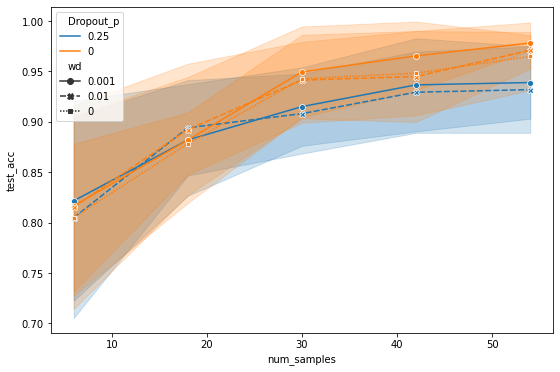

In [194]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

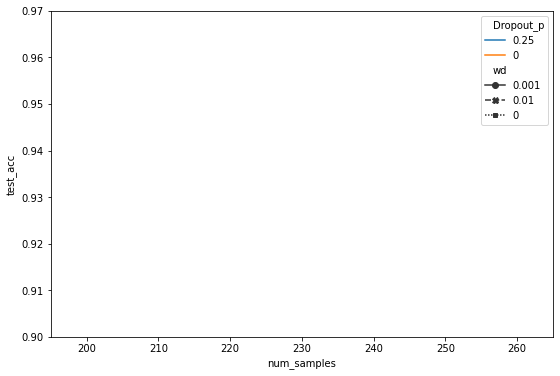

In [195]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
ax.set_xlim(195, 265)
ax.set_ylim(0.90, 0.97)
fig.set_size_inches(9, 6)
plt.show()

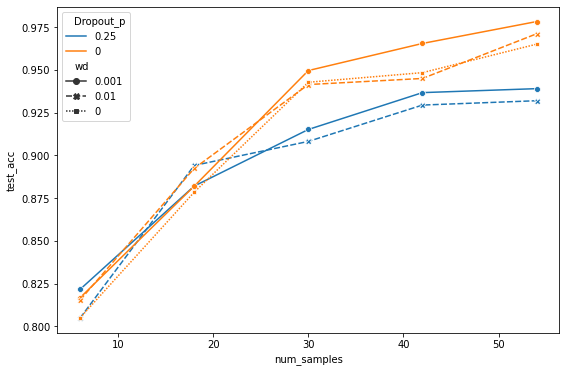

In [196]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci=None
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

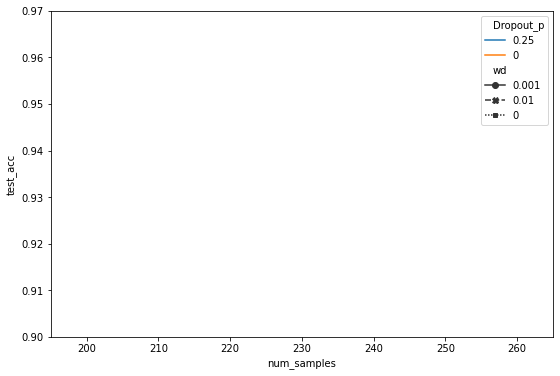

In [197]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci=None
)  # , units=unit_name)
ax.set_xlim(195, 265)
ax.set_ylim(0.90, 0.97)
fig.set_size_inches(9, 6)
plt.show()

In [ ]:
from copy import deepcopy


In [205]:
base_path = Path("/home/c817h/Documents/logs/activelearning/toy_moons_sweeps")
experiment_paths = [
    "fixmatch_bayesian_mlp_deep_drop-0_wd-0_lambda-3_ema-False",
    "basic_bayesian_mlp_deep_drop-0_wd-0.001"
    
    
]

experiment_paths = [base_path/ex_path for ex_path in experiment_paths]

In [210]:
hue_name = "Training"
hue_names = [path.name.split('_')[0] for path in experiment_paths]
style_vals = None

In [211]:
df = []
for i, (base_dir) in enumerate(experiment_paths):
    base_dir = Path(base_dir)
    if hue_names is not None:
        hue_val = hue_names[i]
    else:
        hue_val = None
    if style_vals is not None:
        style_val = style_vals[i]
    else:
        style_val = None
    if unit_vals is not None:
        unit_val = unit_vals[i]
    else:
        unit_val = None

    experiment_frame = get_experiment_df(base_dir, hue_val)
    # experiment_frame[hue_name] = hue_val
    if experiment_frame is None:
        continue
    experiment_frame[hue_name] = hue_val
    experiment_frame[style_name] = style_val
    experiment_frame[unit_name] = unit_val
    df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/fixmatch_bayesian_mlp_deep_drop-0_wd-0_lambda-3_ema-False
Found num files: 10
Loading Experiment: /home/c817h/Documents/logs/activelearning/toy_moons_sweeps/basic_bayesian_mlp_deep_drop-0_wd-0.001
Found num files: 10


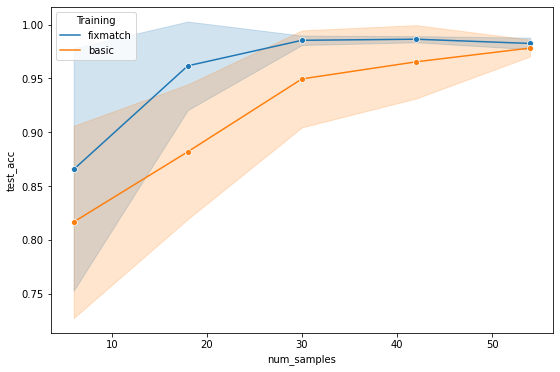

In [212]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

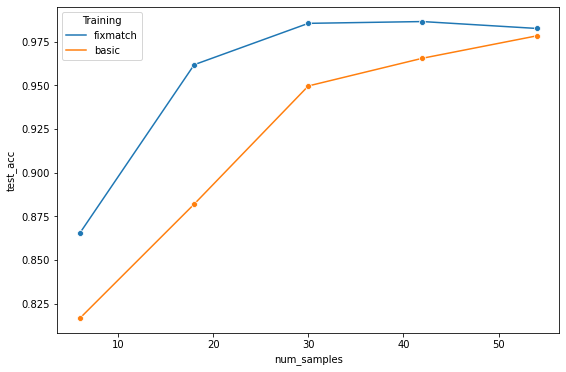

In [215]:
fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci=None
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

In [33]:
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard")
# base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-cifar10_low_data")
base_path = Path("/home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250")
paths = [path for path in base_path.iterdir() if path.is_dir()]
paths.sort()
print("Folders in Path: \n {}\n".format(base_path))

for path in paths:
    print(path.name)

Folders in Path: 
 /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250

model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-bald_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-entropy_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-kcentergreedy_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-random_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-variationratios_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-kcentergreedy_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-random_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-200
model-resnet_drop-0_aug-cifar_randaugment_acq-ent

In [34]:
# fixmatch patterns
match_patterns = [
    r".*drop-0.5_.*",
    r".*drop-0_.*",
]

filter_patterns = [
#     ".*wd-0.01_.*"
]

experiment_paths = []
for path in paths:
#     print(path.name)
    for pattern in match_patterns:
#         print(pattern)
        out = re.match(pattern, str(path))
        if out is not None:
            skip = False
            for filter_pattern in filter_patterns:
                if re.match(filter_pattern, str(path)) is not None:
                    skip=True
            if skip:
                continue
                    
            print(path.name)
            experiment_paths.append(path)
            continue

model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-200
model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-bald_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-entropy_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-kcentergreedy_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-random_ep-200
model-resnet_drop-0.5_aug-cifar_randaugment_acq-variationratios_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-entropy_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-kcentergreedy_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-random_ep-200
model-resnet_drop-0_aug-cifar_basic_acq-variationratios_ep-200
model-resnet_drop-0_aug-cifar_randaugment_acq-entropy_ep-200
model-resnet_drop-0_aug-cifar_randaugment_acq-kcentergreedy_ep-200
model-resnet_drop-0

In [35]:
hue_name = "Acquisition"
hue_split = "acq-"
# style_name = "Augmentation"
# style_fct = lambda x: x.name.split('aug-cifar_')[1].split('_')[0]
style_name = "Augmentation & dropout"
style_fct = lambda x: "Augmentation: {} , Dropout: {}".format(
    x.name.split('aug-cifar_')[1].split('_')[0],
    x.name.split('drop-')[1].split('_')[0],
)
    

# style_fct = lambda x: None

hue_names = [path.name.split(hue_split)[1].split('_')[0] for path in experiment_paths]#.split('_')[0] for path in paths]
style_vals = [style_fct(path) for path in experiment_paths]

unit_vals = None
unit_name = "Unit"

In [36]:
df = []
for i, (base_dir) in enumerate(experiment_paths):
    base_dir = Path(base_dir)
    if hue_names is not None:
        hue_val = hue_names[i]
    else:
        hue_val = None
    if style_vals is not None:
        style_val = style_vals[i]
    else:
        style_val = None
    if unit_vals is not None:
        unit_val = unit_vals[i]
    else:
        unit_val = None

    experiment_frame = get_experiment_df(base_dir, hue_val)
    # experiment_frame[hue_name] = hue_val
    if experiment_frame is None:
        continue
    experiment_frame[hue_name] = hue_val
    experiment_frame[style_name] = style_val
    experiment_frame[unit_name] = unit_val
    df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250/model-resnet_drop-0.5_aug-cifar_basic_acq-bald_ep-200
Found num files: 0
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250/model-resnet_drop-0.5_aug-cifar_basic_acq-entropy_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250/model-resnet_drop-0.5_aug-cifar_basic_acq-kcentergreedy_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250/model-resnet_drop-0.5_aug-cifar_basic_acq-random_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250/model-resnet_drop-0.5_aug-cifar_basic_acq-variationratios_ep-200
Found num files: 0
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/cifar10/active-standard_250/model-resnet_drop-0.5_

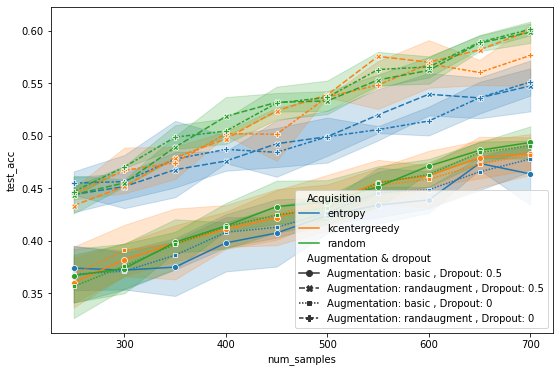

In [37]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

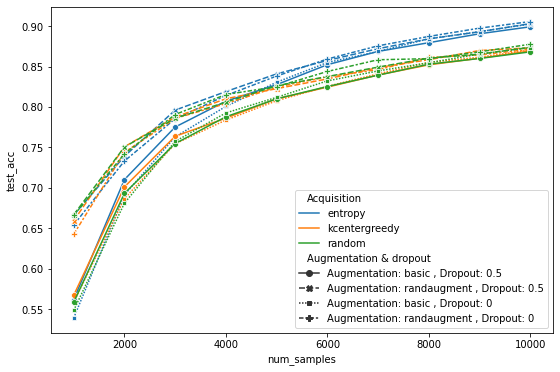

In [28]:
if style_vals is None:
    style_name = None
if unit_vals is None:
    unit_name = None

fig, ax = plt.subplots()
ax = plot_standard_dev(
    ax, df, hue=hue_name, style=style_name, units=unit_name, ci = None
)  # , units=unit_name)
fig.set_size_inches(9, 6)
plt.show()

## Setting paths by Hand

In [64]:
paths = []
# paths += [
#     "basic_set-mnist_batchbald_double_query-bald_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-batchbald_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-entropy_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-variationratios_model-bayesian_mnist_ep-200",
#     "basic_set-mnist_batchbald_double_query-random_model-bayesian_mnist_ep-200",
# ]
paths += [
    "basic_set-mnist_batchbald_query-bald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-batchbald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-entropy_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-variationratios_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_query-random_model-bayesian_mnist_ep-200",
]
paths += [
    "basic_set-mnist_batchbald_start_query-bald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-batchbald_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-entropy_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-variationratios_model-bayesian_mnist_ep-200",
    "basic_set-mnist_batchbald_start_query-random_model-bayesian_mnist_ep-200",
]

style_names = [path.find("start")!=-1 for path in paths]
# style_names = [path.find("double")!=-1 for path in paths]
hue_names = [path.split("query-")[1].split("_")[0] for path in paths]
# base_path = "/home/c817h/Documents/logs_cluster/activelearning/mnist"
base_path = "/home/c817h/Documents/logs_cluster/activelearning/fashion_mnist"
experiment_paths = [os.path.join(base_path, path) for path in paths]

In [4]:
df = []
style_th="start@100"
hue_th="Acq. Fct."

for name, base_dir, style_name in zip(hue_names, experiment_paths, style_names):
    base_dir = Path(base_dir)
    # import IPython

    # IPython.embed()
    # try:
    experiment_frame = get_experiment_df(base_dir, name)

    # this is currently highly experimental -- try to get the configs for later use.
    # experiment_param_frame = get_experiment_configs_df(base_dir, name)
#     experiment_frame["acq-20"] = style_name
    experiment_frame[style_th] = style_name
    df.append(experiment_frame)
    # except:
    #     for path in base_dir.iterdir():
    #         if path.is_dir():
    #             experiment_frame = get_experiment_df(path, name)
    #             df.append(experiment_frame)
    # df.append(experiment_frame)
df = pd.concat(df)
df.reset_index(inplace=True)

Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-bald_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-batchbald_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-entropy_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-variationratios_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_query-random_model-bayesian_mnist_ep-200
Found num files: 3
Loading Experiment: /home/c817h/Documents/logs_cluster/activelearning/fashion_mnist/basic_set-mnist_batchbald_start_query-bald_model-bayesi

ValueError: Could not interpret value `Acquisition` for parameter `hue`

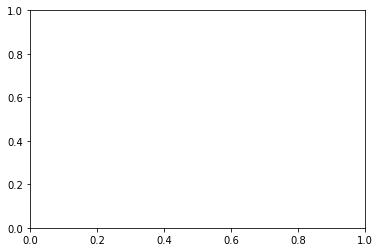

In [65]:
from plotlib.performance_plots import plot_standard_dev
fig, ax = plt.subplots()
plot_standard_dev(ax, df, hue=hue_name, style=style_th)
# ax.set_xlim(95, 250)
# ax.set_ylim(0.85, 0.97)
ax.set_xlim(95, 255)
ax.set_ylim(0.65, 0.775)
fig.set_size_inches(9,6)
plt.show()

In [114]:
from typing import Optional
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

def plot_standard_dev(
    ax: plt.Axes,
    data: pd.DataFrame,
    x: str = "num_samples",
    y: str = "test_acc",
    hue: str = "Sampling",
    style: Optional[str] = None,
    units: Optional[str] = None,
) -> plt.Axes:
    """Creates a lineplot from dataframe with sns.lineplot.
    For information see:
    https://seaborn.pydata.org/generated/seaborn.lineplot.html

    Returns:
        plt.Axes: _description_
    """
    sns.lineplot(
        ax=ax,
        data=data,
        x=x,
        y=y,
        hue=hue,
        ci=None,
        markers=True,
        marker="o",
        dashes=True,
        units=units,
        style=style,
    )
    return ax

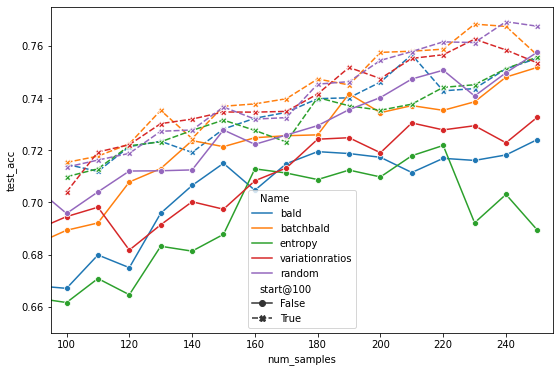

In [116]:
fig, ax = plt.subplots()
plot_standard_dev(ax, df, hue="Name", style=style_th)
ax.set_xlim(95, 255)
ax.set_ylim(0.65, 0.775)
fig.set_size_inches(9,6)
plt.show()